In [1]:
import numpy as np
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

/Users/pewhite/miniconda3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path

'/Users/pewhite/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1'

In [4]:
import os

# List files in the directory to find the CSV file
files_in_directory = os.listdir(path)
print("Files in the directory:", files_in_directory)

# Assuming the CSV file is named 'loan_data.csv' based on the output of os.listdir
csv_file_name = 'loan_data.csv'
csv_file_path = os.path.join(path, csv_file_name)

print("Constructed CSV file path:", csv_file_path)

Files in the directory: ['loan_data.csv']
Constructed CSV file path: /Users/pewhite/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv


In [5]:
df = pd.read_csv(csv_file_path)

In [6]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Identify categorical and numerical features

### Subtask:
Identify which columns in the DataFrame `df` are categorical and which are numerical.


**Reasoning**:
Inspect the data types of the columns in the dataframe `df` to identify numerical and categorical columns.



In [7]:
display(df.info())

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

None

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


## Handle missing values

### Subtask:
Identify and fill in any missing values in the DataFrame.


**Reasoning**:
Calculate the number of missing values for each column in the DataFrame `df` to understand the extent and location of missing data.



In [8]:
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


## One-hot encode categorical features

### Subtask:
Convert the categorical columns into a numerical format using one-hot encoding.


**Reasoning**:
Convert the categorical columns into numerical format using one-hot encoding.



In [9]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


## Prepare data for modeling

### Subtask:
Separate the features (X) and the target variable (y), which is 'loan_status'.


**Reasoning**:
Separate the features (X) and the target variable (y) from the encoded DataFrame.



In [10]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

display(X.head())
display(y.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,False,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,False,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,False,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,False,True,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,True,False,...,True,False,False,True,False,False,True,False,False,False


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Split data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/pewhite/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Evaluate model

### Subtask:
Make predictions on the test data and evaluate the model's performance using metrics like accuracy and a confusion matrix.


**Reasoning**:
Make predictions on the test data and evaluate the model's performance using accuracy and a confusion matrix.



In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8244444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6990
           1       0.70      0.38      0.49      2010

    accuracy                           0.82      9000
   macro avg       0.77      0.67      0.69      9000
weighted avg       0.81      0.82      0.80      9000

Confusion Matrix:
[[6654  336]
 [1244  766]]


## Address the convergence warning


**Reasoning**:
Increase the maximum number of iterations for the LogisticRegression model to address the convergence warning and train the model again.



In [14]:
from sklearn.linear_model import LogisticRegression

# Increase the maximum number of iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/Users/pewhite/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Reasoning**:
Since increasing `max_iter` did not resolve the convergence warning, the next step is to scale the data as suggested in the warning message.



In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model again on the scaled data
model = LogisticRegression(penalty = 'l2', max_iter=1000)
model.fit(X_train_scaled, y_train)


# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Logistic Model Evaluation:
Accuracy: 0.8944444444444445
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.75      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000

Confusion Matrix:
[[6551  439]
 [ 511 1499]]


## Feature engineering

### Subtask:
Explore creating new features from existing ones that might provide more predictive power.


**Reasoning**:
Create new features based on the brainstorming and add them to the encoded DataFrame.



In [16]:
df = pd.read_csv(csv_file_path)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Create new features in the encoded DataFrame
df_encoded['loan_to_income_ratio'] = df_encoded['loan_amnt'] / df_encoded['person_income']
df_encoded['age_income_interaction'] = df_encoded['person_age'] * df_encoded['person_income']
df_encoded['person_age_squared'] = df_encoded['person_age']**2
df_encoded['credit_score_squared'] = df_encoded['credit_score']**2

X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the numerical features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


display(df_encoded.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,loan_to_income_ratio,age_income_interaction,person_age_squared,credit_score_squared
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,False,False,False,True,False,False,0.486462,1582856.0,484.0,314721
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,True,False,False,False,False,True,0.081420,257922.0,441.0,254016
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,True,False,False,False,0.442193,310950.0,625.0,403225
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,True,False,False,False,0.438855,1834319.0,529.0,455625
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,False,False,True,False,False,False,0.529221,1587240.0,576.0,343396


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg_model_improved = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', C=1)
log_reg_model_improved.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_log_reg_improved = log_reg_model_improved.predict(X_test_scaled)

# Evaluate the logistic regression model on the improved data
accuracy_log_reg_improved = accuracy_score(y_test, y_pred_log_reg_improved)
report_log_reg_improved = classification_report(y_test, y_pred_log_reg_improved)
conf_matrix_log_reg_improved = confusion_matrix(y_test, y_pred_log_reg_improved)

print("Logistic Regression Model Evaluation on Improved Data:")
print(f"Accuracy: {accuracy_log_reg_improved}")
print("Classification Report:")
print(report_log_reg_improved)
print("Confusion Matrix:")
print(conf_matrix_log_reg_improved)

Logistic Regression Model Evaluation on Improved Data:
Accuracy: 0.8941111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000

Confusion Matrix:
[[6554  436]
 [ 517 1493]]


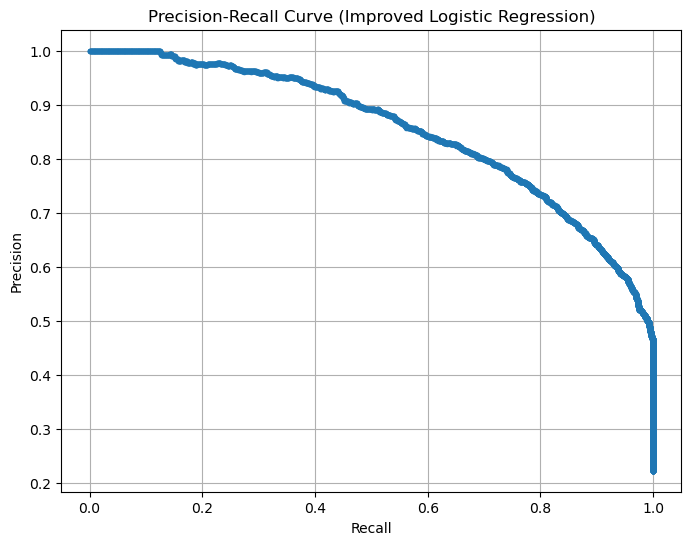

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set from the improved logistic regression model
y_prob_log_reg_improved = log_reg_model_improved.predict_proba(X_test_scaled)[:, 1] # Probability of class 1

# Get precision, recall, and thresholds for the improved logistic regression model
precision_log_reg_improved, recall_log_reg_improved, thresholds_log_reg_improved = precision_recall_curve(y_test, y_prob_log_reg_improved)

# Plot the precision-recall curve for the improved logistic regression model
plt.figure(figsize=(8, 6))
plt.plot(recall_log_reg_improved, precision_log_reg_improved, marker='.')
plt.title('Precision-Recall Curve (Improved Logistic Regression)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()